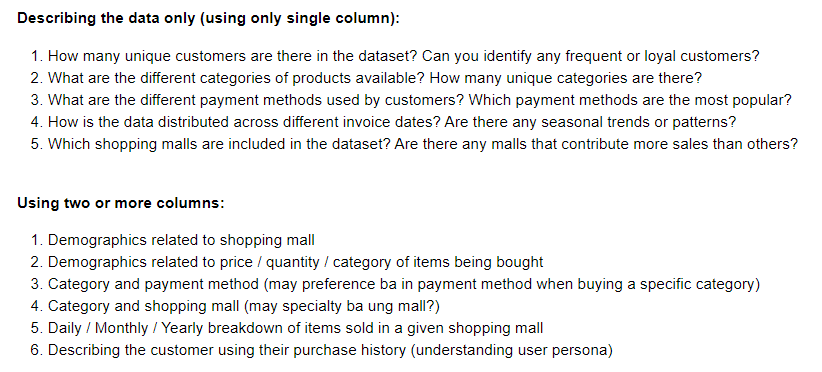

In [1]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [2]:
json_df = pd.read_json("dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [3]:
# .unique()
# .value_counts()

In [4]:
len(df["customer_id"].unique())

5191

In [5]:
df["customer_id"].value_counts()

50      128
7       121
4       117
80      113
74      112
       ... 
3677      1
4695      1
6468      1
4937      1
4761      1
Name: customer_id, Length: 5191, dtype: int64

In [6]:
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [7]:
len(df["category"].unique())

8

In [8]:
df["category"].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [9]:
df["payment_method"].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [10]:
len(df["payment_method"].unique())

3

In [11]:
df["payment_method"].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [12]:
# NON VECTORIZED --> this is slow
unique_customer_set = set()

for customer in df["customer_id"]:
    unique_customer_set.add(customer)
    
print(len(unique_customer_set))

5191


In [14]:
import pandas as pd

new_df = pd.read_csv(r"C:\Users\adrie\OneDrive\Desktop\Day 7\fct_invoice.csv")

new_df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adrie\\OneDrive\\Desktop\\Day 7\\fct_invoice.csv'

In [ ]:
jsondf = pd.read_json('dim_customer.json')
jsondf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [ ]:
new_df["customer_id"].value_counts()

50      128
7       121
4       117
80      113
74      112
       ... 
3677      1
4695      1
6468      1
4937      1
4761      1
Name: customer_id, Length: 5191, dtype: int64

In [ ]:
df["total rev"] = df["quantity"] * df["price"]
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total rev
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [ ]:
df["total rev"].sum()

251505794.25000003

In [ ]:
df.groupby("shopping_mall").count()['customer_id']

shopping_mall
Cevahir AVM           4991
Emaar Square Mall     4811
Forum Istanbul        4947
Istinye Park          9781
Kanyon               19823
Mall of Istanbul     19943
Metrocity            15011
Metropol AVM         10161
Viaport Outlet        4914
Zorlu Center          5075
Name: customer_id, dtype: int64

In [ ]:
df.groupby("shopping_mall").sum()['quantity']

C:\Users\adrie\AppData\Local\Temp\ipykernel_1924\1091945780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("shopping_mall").sum()


,customer_id,quantity,price,total rev
shopping_mall,,,,
Cevahir AVM,4982298,14949,3433671.84,12645138.20
Emaar Square Mall,4859527,14501,3390408.31,12406100.29
Forum Istanbul,4822975,14852,3336073.82,12303921.24
Istinye Park,9649583,29465,6717077.54,24618827.68
Kanyon,19911638,59457,13710755.24,50554231.10
Mall of Istanbul,19800478,60114,13851737.62,50872481.68
Metrocity,15290743,44894,10249980.07,37302787.33
Metropol AVM,9982722,30530,6937992.99,25379913.19
Viaport Outlet,5034829,14716,3414019.46,12521339.72


In [ ]:
df.head(2)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total rev
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53


In [ ]:
json_df.head(2)

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe


In [ ]:
new_df2 = df.merge(json_df, how="left", left_on = 'customer_id', right_on = 'id')
new_df2.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total rev,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes


In [ ]:
new_df = df[['customer_id', 'shopping_mall', "category"]].copy()
new_df["id"] = new_df['customer_id']

new_df = new_df.merge(json_df, how="left")
new_df.head()

,customer_id,shopping_mall,category,id,age,first_name,gender,last_name
0,229,Kanyon,Clothing,229,NaN,William,M,Anderson
1,3433,Forum Istanbul,Shoes,3433,34.0,Danielle,F,Rivera
2,644,Metrocity,Clothing,644,46.0,Christopher,M,Stephens
3,4900,Metropol AVM,Shoes,4900,46.0,Laura,F,Kelly
4,1089,Kanyon,Books,1089,NaN,Richard,M,Rhodes


In [ ]:
new_df.groupby(["shopping_mall","gender",]).count()["id"]

shopping_mall      gender
Cevahir AVM        F          2594
                   M          2397
Emaar Square Mall  F          2460
                   M          2351
Forum Istanbul     F          2640
                   M          2307
Istinye Park       F          5016
                   M          4765
Kanyon             F         10244
                   M          9579
Mall of Istanbul   F         10233
                   M          9710
Metrocity          F          7756
                   M          7255
Metropol AVM       F          5230
                   M          4931
Viaport Outlet     F          2548
                   M          2366
Zorlu Center       F          2665
                   M          2410
Name: id, dtype: int64

In [ ]:
new_df.groupby(["category","gender",]).count()["id"]

category         gender
Books            F          2573
                 M          2408
Clothing         F         17808
                 M         16679
Cosmetics        F          7785
                 M          7312
Food & Beverage  F          7696
                 M          7080
Shoes            F          5167
                 M          4867
Souvenir         F          2571
                 M          2428
Technology       F          2533
                 M          2463
Toys             F          5253
                 M          4834
Name: id, dtype: int64

In [ ]:
new_df.groupby(['shopping_mall','gender']).count()['customer_id']

shopping_mall      gender
Cevahir AVM        F          2594
                   M          2397
Emaar Square Mall  F          2460
                   M          2351
Forum Istanbul     F          2640
                   M          2307
Istinye Park       F          5016
                   M          4765
Kanyon             F         10244
                   M          9579
Mall of Istanbul   F         10233
                   M          9710
Metrocity          F          7756
                   M          7255
Metropol AVM       F          5230
                   M          4931
Viaport Outlet     F          2548
                   M          2366
Zorlu Center       F          2665
                   M          2410
Name: customer_id, dtype: int64